In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv


In [2]:
train = pd.read_csv("/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv")
test = pd.read_csv("/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv")

In [3]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [4]:
df = pd.concat([train,test], axis=0, ignore_index = True)

In [5]:
df['Date_Registered'] = pd.to_datetime(df['Date_Registered'])
df['payment_datetime'] = pd.to_datetime(df['payment_datetime'])
df['purchased_datetime'] = pd.to_datetime(df['purchased_datetime'])
df['released_date'] = pd.to_datetime(df['released_date'])
df['estimated_delivery_date'] = pd.to_datetime(df['estimated_delivery_date'])
df['received_date'] = pd.to_datetime(df['received_date'])

In [6]:
df['loyalty_duration'] = (df['received_date'] - df['Date_Registered']).dt.days

In [7]:
df['order_frequency'] = df.apply(
    lambda row: 0 if row['loyalty_duration'] == 0 else 1 / (row['loyalty_duration'] + 1),
    axis=1
)

In [8]:
df['loyalty_points_per_day'] = df.apply(
    lambda row: 0 if row['loyalty_points_redeemed'] == 0 else row['loyalty_points_redeemed'] / (row['loyalty_duration'] + 1),
    axis=1
)


In [9]:
df['Registered_year'] = df['Date_Registered'].dt.year
df['Registered_month'] = df['Date_Registered'].dt.month
df['Registered_day_of_week'] = df['Date_Registered'].dt.dayofweek

df['payment_year'] = df['payment_datetime'].dt.year
df['payment_month'] = df['payment_datetime'].dt.month
df['payment_day_of_week'] = df['payment_datetime'].dt.dayofweek

df['released_year'] = df['released_date'].dt.year
df['released_month'] = df['released_date'].dt.month
df['released_day_of_week'] = df['released_date'].dt.dayofweek

df['estimated_delivery_year'] = df['estimated_delivery_date'].dt.year
df['estimated_delivery_month'] = df['estimated_delivery_date'].dt.month
df['estimated_delivery_day_of_week'] = df['estimated_delivery_date'].dt.dayofweek

df['received_year'] = df['received_date'].dt.year
df['received_month'] = df['received_date'].dt.month
df['received_day_of_week'] = df['received_date'].dt.dayofweek

df['purchase_year'] = df['purchased_datetime'].dt.year
df['purchase_month'] = df['purchased_datetime'].dt.month
df['purchase_day_of_week'] = df['purchased_datetime'].dt.dayofweek

In [10]:
df['Delay_of_delevary'] = df['received_date']-df['estimated_delivery_date']

In [11]:
df['Delevary_duration'] = df['received_date'] - df['released_date']

In [12]:
df['Payment_duration'] = df['payment_datetime'] - df['purchased_datetime']

In [13]:
df.dtypes

id                                               int64
user_id                                         object
age                                              int64
Gender                                          object
Date_Registered                         datetime64[ns]
Is_current_loyalty_program_member               object
loyalty_points_redeemed                          int64
loyalty_tier                                   float64
Received_tier_discount_percentage              float64
Received_card_discount_percentage              float64
Received_coupon_discount_percentage              int64
product_category                                object
Product_value                                    int64
transaction_id                                  object
order_id                                        object
payment_method                                  object
payment_datetime                        datetime64[ns]
purchased_datetime                      datetime64[ns]
purchase_m

In [14]:
df['Delay_of_delevary_days'] = df['Delay_of_delevary'].dt.days

df['Delevary_duration_days'] = df['Delevary_duration'].dt.days

df['Payment_duration_days'] = df['Payment_duration'].dt.days

In [15]:
df['Delay_of_delevary_week'] = df['Delay_of_delevary_days'] //7
df['Delevary_duration_week'] = df['Delevary_duration_days'] //7

In [16]:
df.drop(columns=['Delay_of_delevary', 'Delevary_duration', 'Payment_duration', 'payment_datetime', 'Date_Registered', 'purchased_datetime', 'released_date', 'estimated_delivery_date', 'received_date'], inplace=True)

In [17]:
df['tracking_number'].describe

<bound method NDFrame.describe of 0         ***9AWDD64SYI
1         ***3SSRORRZ0X
2         ***2VSB7MH7FN
3         ***9XENHE2PKZ
4         ***QTWLMEL0PE
              ...      
344935    ***YNJDKIJLK9
344936    ***L3Y7UFTDQX
344937    ***OLT1FFKXSG
344938    ***HDJFMBF0LX
344939    ***KRRE7JARGZ
Name: tracking_number, Length: 344940, dtype: object>

In [18]:
df.drop(columns=['tracking_number',  'user_id', 'transaction_id', 'order_id'], inplace=True)

In [19]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output = False)
    one_hot_encoded_array = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded_array, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

columns_to_encode = ['Gender', 'Is_current_loyalty_program_member', 'purchase_medium', 'shipping_method']

for col in columns_to_encode:
    df = one_hot_encode_and_add(df, col)

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['payment_method_encoded'] = encoder.fit_transform(df['payment_method'])

encoder = LabelEncoder()
df['product_category_encoded'] = encoder.fit_transform(df['product_category'])

df.drop(columns=['product_category', 'payment_method'], inplace=True)


In [21]:
df['age'] = df['age'].astype('Int8')
df['loyalty_points_redeemed'] = df['loyalty_points_redeemed'].astype('Int8')
df['Registered_month'] = df['Registered_month'].astype('Int8')
df['Registered_day_of_week'] = df['Registered_day_of_week'].astype('Int8')
df['payment_month'] = df['payment_month'].astype('Int8')
df['payment_day_of_week'] = df['payment_day_of_week'].astype('Int8')
df['released_month'] = df['released_month'].astype('Int8')
df['released_day_of_week'] = df['released_day_of_week'].astype('Int8')
df['estimated_delivery_month'] = df['estimated_delivery_month'].astype('Int8')
df['estimated_delivery_day_of_week'] = df['estimated_delivery_day_of_week'].astype('Int8')
df['received_month'] = df['received_month'].astype('Int8')
df['received_day_of_week'] = df['received_day_of_week'].astype('Int8')
df['purchase_month'] = df['purchase_month'].astype('Int8')
df['purchase_day_of_week'] = df['purchase_day_of_week'].astype('Int8')
df['Delay_of_delevary_days'] = df['Delay_of_delevary_days'].astype('Int8')
df['Delevary_duration_days'] = df['Delevary_duration_days'].astype('Int8')
df['Payment_duration_days'] = df['Payment_duration_days'].astype('Int8')
df['Delay_of_delevary_week'] = df['Delay_of_delevary_week'].astype('Int8')
df['Delevary_duration_week'] = df['Delevary_duration_week'].astype('Int8')
df['Gender_F'] = df['Gender_F'].astype('Int8')
df['Gender_O'] = df['Gender_O'].astype('Int8')
df['Gender_M'] = df['Gender_M'].astype('Int8')
df['Is_current_loyalty_program_member_YES'] = df['Is_current_loyalty_program_member_YES'].astype('Int8')
df['Is_current_loyalty_program_member_NO'] = df['Is_current_loyalty_program_member_NO'].astype('Int8')
df['purchase_medium_in-store'] = df['purchase_medium_in-store'].astype('Int8')
df['purchase_medium_online'] = df['purchase_medium_online'].astype('Int8')
df['shipping_method_express'] = df['shipping_method_express'].astype('Int8')
df['shipping_method_standard'] = df['shipping_method_standard'].astype('Int8')
df['payment_method_encoded'] = df['payment_method_encoded'].astype('Int8')
df['product_category_encoded'] = df['product_category_encoded'].astype('Int8')

df['loyalty_tier'] = df['loyalty_tier'].astype('Float32')
df['Received_card_discount_percentage'] = df['Received_card_discount_percentage'].astype('Float32')
df['Received_coupon_discount_percentage'] = df['Received_coupon_discount_percentage'].astype('Float32')

In [22]:
df['avg_order_value'] = df['final_payment'] / df['Product_value']


In [23]:
df['total_discount_percentage'] = (df['Received_tier_discount_percentage'] +
                                    df['Received_card_discount_percentage'] +
                                    df['Received_coupon_discount_percentage'])


In [24]:
df['discount_ratio'] = df['total_discount_percentage'] / df['Product_value']

In [25]:
df.isnull().sum()

id                                            0
age                                           0
loyalty_points_redeemed                       0
loyalty_tier                                  0
Received_tier_discount_percentage             0
Received_card_discount_percentage             0
Received_coupon_discount_percentage           0
Product_value                                 0
final_payment                                 0
customer_experience                      137971
loyalty_duration                              0
order_frequency                               0
loyalty_points_per_day                        0
Registered_year                               0
Registered_month                              0
Registered_day_of_week                        0
payment_year                                  0
payment_month                                 0
payment_day_of_week                           0
released_year                                 0
released_month                          

In [26]:
train = df[df.index < 206969]
test = df[df.index >= 206969]
test = test.drop(columns=['customer_experience'])

In [27]:
train['customer_experience'] = train['customer_experience'].replace('bad',0)
train['customer_experience'] = train['customer_experience'].replace('neutral',1)
train['customer_experience'] = train['customer_experience'].replace('good',2)

<ipython-input-27-a19c12a3c14b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['customer_experience'] = train['customer_experience'].replace('bad',0)
<ipython-input-27-a19c12a3c14b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['customer_experience'] = train['customer_experience'].replace('neutral',1)
<ipython-input-27-a19c12a3c14b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [28]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting


def make_mi_scores(X, y):
    X = X.copy()
    X = X.dropna() 
    y = y.loc[X.dropna().index]
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
train_x = train.drop(columns=['customer_experience','id'], axis=1)  
train_y = train['customer_experience']

  

received_day_of_week                     0.063214
loyalty_duration                         0.044471
order_frequency                          0.040421
Delevary_duration_days                   0.029676
avg_order_value                          0.028699
Delevary_duration_week                   0.027271
loyalty_points_per_day                   0.027068
Payment_duration_days                    0.023850
Delay_of_delevary_week                   0.021180
total_discount_percentage                0.017294
Registered_year                          0.015970
Delay_of_delevary_days                   0.014204
Gender_M                                 0.013539
Gender_O                                 0.012749
Gender_F                                 0.012588
purchase_medium_in-store                 0.012285
purchase_medium_online                   0.012285
shipping_method_express                  0.012090
shipping_method_standard                 0.012090
Received_card_discount_percentage        0.011647


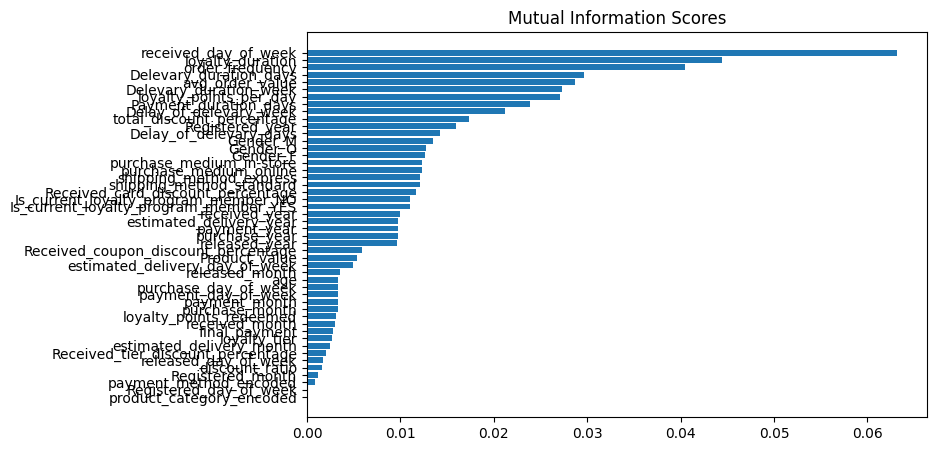

In [29]:
mi_scores = make_mi_scores(train_x, train_y)

print(mi_scores)
# print(mi_scores.tail(20))  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
# plot_mi_scores(mi_scores.tail(20))

In [30]:
from sklearn.model_selection import train_test_split

x = train.drop(columns=['customer_experience'], axis=1)
y = train['customer_experience']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify = y)

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(test)

x = pd.DataFrame(x_train_scaled, columns=x.columns, index=x.index)
test = pd.DataFrame(x_test_scaled, columns=test.columns, index=test.index)

<h2>XGBClassifier</h2>

max_depth=8, learning_rate=0.05, n_estimators=50, Accuracy: 62.31%
max_depth=8, learning_rate=0.05, n_estimators=100, Accuracy: 63.61%
max_depth=8, learning_rate=0.05, n_estimators=150, Accuracy: 64.12%
max_depth=8, learning_rate=0.1, n_estimators=50, Accuracy: 63.51%
max_depth=8, learning_rate=0.1, n_estimators=100, Accuracy: 64.38%
max_depth=8, learning_rate=0.1, n_estimators=150, Accuracy: 64.64%
max_depth=8, learning_rate=0.15, n_estimators=50, Accuracy: 63.77%
max_depth=8, learning_rate=0.15, n_estimators=100, Accuracy: 64.52%
max_depth=8, learning_rate=0.15, n_estimators=150, Accuracy: 64.67%
max_depth=10, learning_rate=0.05, n_estimators=50, Accuracy: 63.66%
max_depth=10, learning_rate=0.05, n_estimators=100, Accuracy: 64.49%
max_depth=10, learning_rate=0.05, n_estimators=150, Accuracy: 64.78%
max_depth=10, learning_rate=0.1, n_estimators=50, Accuracy: 64.39%
max_depth=10, learning_rate=0.1, n_estimators=100, Accuracy: 65.04%
max_depth=10, learning_rate=0.1, n_estimators=150, Ac

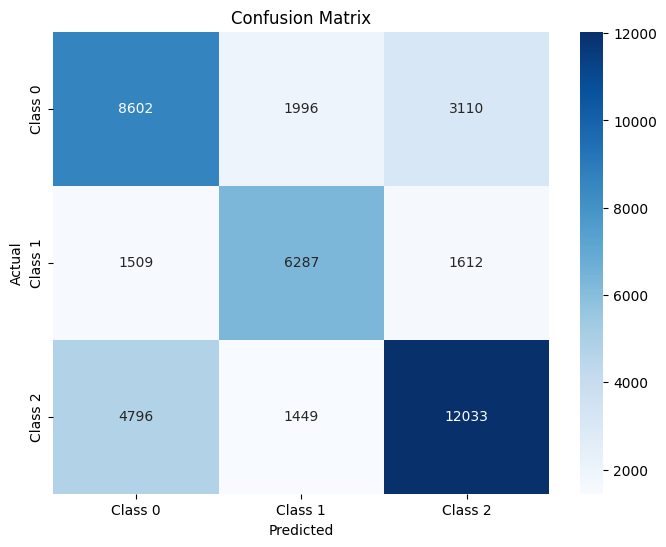

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# List of hyperparameters to test
depths = [8, 10, 12]  # max_depth values
learning_rates = [0.05, 0.1, 0.15]  # learning rates
n_estimators = [50, 100, 150]  # number of estimators

# Store the best result
best_accuracy = 0
best_model = None

# Try different combinations of hyperparameters
for max_depth in depths:
    for learning_rate in learning_rates:
        for n_est in n_estimators:
            # Define the model with the current set of hyperparameters
            model = XGBClassifier(
                objective='multi:softmax',
                num_class=3,
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_est,
                subsample=1.0,
                colsample_bytree=0.8
            )

            # Fit the model
            model.fit(x_train, y_train)

            # Make predictions
            preds = model.predict(x_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, preds)
            print(f"max_depth={max_depth}, learning_rate={learning_rate}, n_estimators={n_est}, Accuracy: {accuracy * 100:.2f}%")

            # Update the best model if necessary
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

# Final evaluation of the best model
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")

# Generate and plot the confusion matrix for the best model
cm = confusion_matrix(y_test, best_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(3)], yticklabels=[f'Class {i}' for i in range(3)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h2>Pytorch</h2>

convert data to pytorch tensors 

In [33]:
import torch

# If your data is in DataFrames, convert them to NumPy arrays first
x_train_tensor = torch.tensor(x.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y.values, dtype=torch.long)  # Use long for classification labels
test_tensor = torch.tensor(test.values, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


create a custome data set

In [34]:
class CustomDataset(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        if self.y is None:  # If no labels (test set), return only the input features
            return self.x[idx]
        return self.x[idx], self.y[idx]

# Create datasets
train_dataset = CustomDataset(x_train_tensor, y_train_tensor)
test_dataset = CustomDataset(test_tensor)  # No labels for test dataset

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


NameError: name 'Dataset' is not defined

handle batching and shuffling

define the model

In [ ]:
import torch
import torch.nn as nn  # Import nn
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define model
input_size = x.shape[1]  # Number of features
output_size = len(torch.unique(y_train_tensor))  # Number of classes
model = MyModel(input_size, output_size)



define the loss function and optimizer

In [ ]:
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce learning rate after every 5 epochs


In [ ]:
#train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(10):  # Number of epochs
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')


evaluate the model

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Ensure model is in evaluation mode
model.eval()

# Initialize a list to store predictions
predictions = []

# Initialize a list to store true labels
true_labels = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:  # Include both x_batch and y_batch
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        outputs = model(x_batch)
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        predictions.extend(predicted.cpu().numpy())  # Add predictions to the list
        true_labels.extend(y_batch.cpu().numpy())   # Add true labels to the list

# Convert predictions and true labels to NumPy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch

# If your data is in DataFrames, convert them to NumPy arrays first
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Use long for classification labels
test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
import torch
import torch.nn as nn  # Import nn
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define model
input_size = x_train.shape[1]  # Number of features
output_size = len(torch.unique(y_train_tensor))  # Number of classes
model = MyModel(input_size, output_size)



In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        if self.y is None:  # If no labels (test set), return only the input features
            return self.x[idx]
        return self.x[idx], self.y[idx]

# Create datasets
train_dataset = CustomDataset(x_train_tensor, y_train_tensor)
test_dataset = CustomDataset(test_tensor, y_test_tensor)  

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score  # Or any metric you prefer

# Example of a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Example of loss function and evaluation metric
criterion = nn.CrossEntropyLoss()


In [ ]:
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, device):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate on the test set
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader

# Example of a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, device, epochs):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate on the test set
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Set device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters to manually test
learning_rates = [0.001, 0.01]  # Example values
batch_sizes = [32, 64]          # Example values
hidden_dims = [64, 128]         # Example values
epochs = 10                     # Example epochs

# Store the best hyperparameters and accuracy
best_accuracy = 0
best_params = {}

# Loop through all combinations of hyperparameters (Grid Search)
for lr in learning_rates:
    for batch_size in batch_sizes:
        for hidden_dim in hidden_dims:
            # Prepare model, optimizer, and loss function
            model = SimpleNN(input_dim=x_train_tensor.shape[1], hidden_dim=hidden_dim, output_dim=3).to(device)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()

            # Update DataLoader with current batch size
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            # Train and evaluate the model with the current configuration
            accuracy = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, device, epochs)

            # Print the accuracy for the current hyperparameter set
            print(f"Accuracy for LR={lr}, Batch Size={batch_size}, Hidden Dim={hidden_dim}: {accuracy}")

            # Track the best hyperparameters and accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'hidden_dim': hidden_dim}

# Print the best hyperparameters and accuracy
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")
